# Лабораторная работа №3: Частотный анализ полиномиальных приближений

Выполнили студенты гр. 2383 Борисов Иван Вадимович и Сыздыков Нургалым Конакбаевич. Вариант №8.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.


## Основные теоретические положения

Входной сигнал:
$$s(t)=\sum^M_{m=1}c_me^{i\omega_mt}$$
Выходной сигнал:
$$y(t)=\sum^M_{m=1}c_mH(\omega_m)e^{i\omega_mt}$$
Формула для вычисления передаточной функции рекурсивного фильтра $y_n$ дискретного сигнала $x_n$:
$$H(\omega)=\frac{y_n}{x_n}$$
Метод наименьших квадратов:
$$F(y_k)=\sum^k_{-k}(s_k-y_k)^2\rightarrow\min$$
Связь передаточной функции для круговой частоты и циклической:
$$H(\omega)=H(2\pi f)=\tilde{H}(f)$$
Перевод значений передаточной функции в логарифмическую шкалу:
$$1dB=20\lg\left(\left|\frac{y_n}{s_n}\right|\right)=20\lg\left(\left|H(\omega)\right|\right)$$

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde{H}(f)$
. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

### Задание 1
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt


plt.style.use('seaborn-v0_8-darkgrid')
plt.rcParams['figure.figsize'] = (12, 8)


STEP: float = 0.0003
freq: np.ndarray = np.arange(0, 0.5, STEP)  # циклическая частота
w_freq: list[float] = [2 * math.pi * f for f in freq]  # круговая частота

Входной сигнал:
$$s(t)$$
Выходной сигнал:
$$y(t)=A+Bt$$
Приближение методом МНК прямой линием по трём точкам:
$$F(A,B)=\sum^{k=1}_{k=-1}(s_k-y_k)^2=\sum^{k=1}_{k=-1}(s_k-A-Bk)^2\Rightarrow\min$$
$$F(A, B) = \sum^{k=1}_{k=-1} A^2 + \sum^{k=1}_{k=-1} 2 A B k + \sum^{k=1}_{k=-1} B^2 k^2 - \sum^{k=1}_{k=-1} 2 A s_k - \sum^{k=1}_{k=-1} 2 B k s_k + \sum^{k=1}_{k=-1}s^2_k = $$
$$ = 3A^2 + 2 B^2  - \sum^{k=1}_{k=-1} 2 A s_k + \sum^{k=1}_{k=-1}s^2_k - \sum^{k=1}_{k=-1} 2 B k s_k$$
Возьмем частные производые по $A$ и $B$:
$$\frac{\partial F(A, B)}{\partial A} = 6A - \sum^{k=1}_{k=-1} 2 s_k $$
$$\frac{\partial F(A, B)}{\partial B} = 4B - \sum^{k=1}_{k=-1} 2 k s_k $$
Составим систему нормальных уравнений:
$$\begin{cases}
3A+0B=\sum^{k=1}_{k=-1}s_k\\
0A+2B=\sum^{k=1}_{k=-1}ks_k
\end{cases}$$
Далее:
$$y_0=A=\frac{1}{3}\sum^{k=1}_{k=-1}s_k=\frac{1}{3}(s_{-1}+s_0+s_1)$$
В общем случае:
$$y_n=\frac{1}{3}\sum^{k=n+1}_{k=n-1}s_k=\frac{1}{3}(s_{n-1}+s_n+s_{n+1})$$
Пусть $s_n=e^{i\omega n}$
$$y_n=\frac{1}{3}(e^{-i\omega}+1+e^{i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
$$H(\omega)=\frac{1}{3}(e^{-i\omega}+1+e^{i\omega})=\frac{1}{3}(1+2\cos(\omega))$$
Вывод для формул для 5, 7 и 9 точек абсолютно аналогичен.


Формула для 5 точек:
$$H(\omega)=\frac{1}{5}(e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega})=\frac{1}{5}(1+2\cos(\omega)+2\cos(2\omega))$$

Формула для 7 точек:
$$H(\omega)=\frac{1}{7}(e^{-3i\omega}+e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega}+e^{3i\omega})=\frac{1}{7}(1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega))$$

Формула для 9 точек:
$$H(\omega)=\frac{1}{9}(e^{-4i\omega}+e^{-3i\omega}+e^{-2i\omega}+e^{-i\omega}+1+e^{i\omega}+e^{2i\omega}+e^{3i\omega}+e^{4i\omega}) = $$
$$=\frac{1}{9}(1+2\cos(\omega)+2\cos(2\omega)+2\cos(3\omega)+2\cos(4\omega))$$


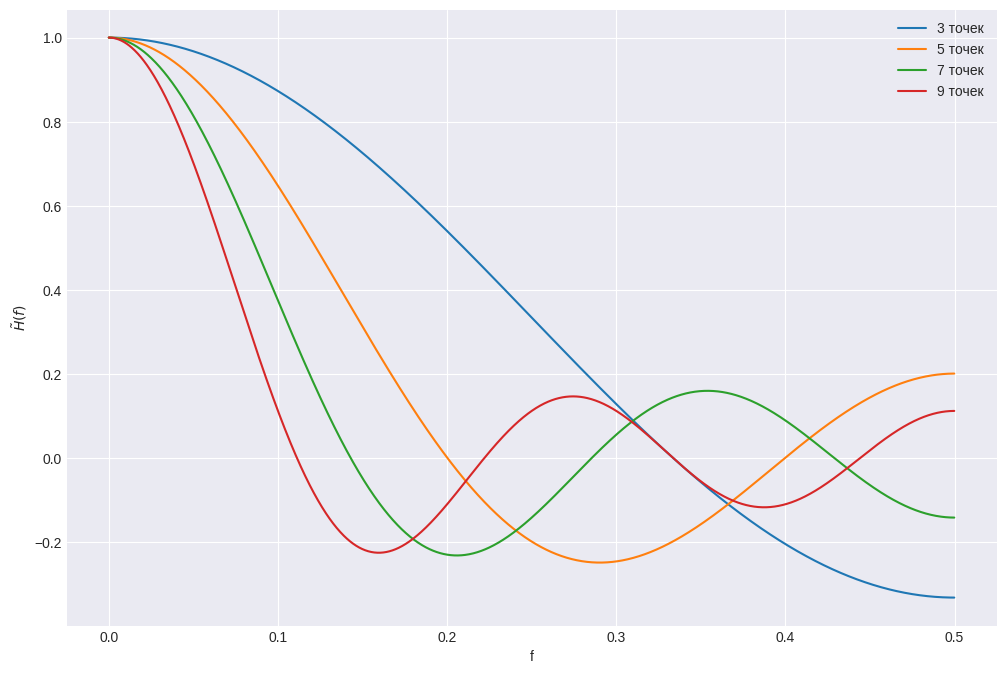

In [2]:
fun_1: dict[int, list[float]] = {
    3: [1 / 3 * (1 + 2 * np.cos(w)) for w in w_freq],
    5: [1 / 5 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w)) for w in w_freq],
    7: [1 / 7 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w)) for w in w_freq],
    9: [1 / 9 * (1 + 2 * np.cos(w) + 2 * np.cos(2 * w) + 2 * np.cos(3 * w) + 2 * np.cos(4 * w)) for w in w_freq]
}

plt.figure()
for pnt, fun in fun_1.items():
    plt.plot(freq, fun, label=f'{pnt} точек')


plt.ylabel('$\\tilde H(f)$')
plt.xlabel('f')
plt.legend()

Все фильтры пропускают постоянную составляющую сигнала. С ростом количества точек (N) фильтр сглаживает сильнее.
Амплитуда падает по мере движения к частоте f=0.5

Фильтр с N=9 начинает подавлять не только самый высокочастотный шум, но и более низкие частоты, делая итоговый сигнал более гладким. Однако фильтры для N = 5, 7, 9 могут пропустить высокие частоты, что может исказить сигнал.

### Задание 2
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал:
$$s(t)$$
Выходной сигнал:
$$y(t)=A+Bt+Ct^2$$
Приближение методом МНК полиномом второй степени по семи точкам:
$$F(A,B,C)=\sum^{k=3}_{k=-3}(s_k-y_k)^2=\sum^{k=3}_{k=-3}(s_k-A-Bk-Ck^2)^2\Rightarrow\min$$
Возьмем частные производые по $A$, $B$ и $C$:
$$\frac{\partial F(A, B)}{\partial A} =\sum^{k=3}_{k=-3} \frac{\partial (s_k-A-Bt-Ct^2)^2}{\partial A} = \sum^{k=3}_{k=-3} 2 (s_k - A - Bk - Ck^2) \cdot (-1) $$
$$\frac{\partial F(A, B)}{\partial B} = \sum^{k=3}_{k=-3} \frac{\partial (s_k-A-Bt-Ct^2)^2}{\partial B} = \sum^{k = 3}_{k=-3} 2 (s_k - A - Bk - Ck^2) \cdot (-t)$$
$$\frac{\partial F(A, B)}{\partial C} = \sum^{k=3}_{k=-3} \frac{\partial (s_k-A-Bt-Ct^2)^2}{\partial C} = \sum^{k = 3}_{k=-3} 2 (s_k - A - Bk - Ck^2) \cdot (-t^2)$$
Приравняем все к нулю:
$$\sum^{k=3}_{k=-3} s_k - 7 A - B \sum^{k=3}_{k=-3} k - C \sum^{k=3}_{k=-3} k^2 = 0$$
$$\sum^{k=3}_{k=-3} s_k - 7A - 28C = 0$$
$$
\boxed{7A + 28C = \sum_{k=-3}^{3} s_k}
$$

$$
\sum^{k=3}_{k=-3} ks_k - A \sum^{k=3}_{k=-3} k - B \sum^{k=3}_{k=-3} k^2 - C \sum^{k=3}_{k=-3} k^3 = 0
$$

$$
\sum^{k=3}_{k=-3} ks_k - 28B = 0
$$

$$
\boxed{28B = \sum_{k=-3}^{3} k s_k}
$$

$$ \sum_{k=-3}^{3} k^2(s_k - A - Bk - Ck^2) = 0 $$
$$ \sum_{k=-3}^{3} k^2 s_k - A \sum_{k=-3}^{3} k^2 - B \sum_{k=-3}^{3} k^3 - C \sum_{k=-3}^{3} k^4 = 0 $$

$$ \sum_{k=-3}^{3} k^2 s_k - 28A - 196C = 0 $$

$$ \boxed{28A + 196C = \sum_{k=-3}^{3} k^2 s_k }$$



Составим систему нормальных уравнений:
$$\begin{cases}
7A+28C=\sum^{k=3}_{k=-3}s_k\\
28B=\sum^{k=3}_{k=-3}ks_k\\
28A+196C=\sum^{k=3}_{k=-3}k^2s_k\\
\end{cases}$$
Вычтем первое уравнение, умноженное на 7, из третьего:
$$-21A=2s_{-3}-3s_{-2}-6s_{-1}-7s_0-6s_1-3s_2+2s_3$$
Получаем:
$$y_0=A=\frac{1}{21}(-2s_{-3}+3s_{-2}+6s_{-1}+7s_0+6s_1+3s_2-2s_3)$$
В общем случае:
$$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_n+6s_{n+1}+3s_{n+2}-2s_{n+3})$$
Пусть $s_n=e^{i\omega n}$, тогда:
$$y_n=\frac{1}{21}(-2e^{-3i\omega}+3e^{-2i\omega}+6e^{-i\omega}+7+6e^{i\omega}+3e^{2i\omega}-2e^{3i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
Значит:
$$H(\omega)=\frac{1}{21}(-2e^{-3i\omega}+3e^{-2i\omega}+6e^{-i\omega}+7+6e^{i\omega}+3e^{2i\omega}-2e^{3i\omega})=\frac{1}{21}(7+12\cos(\omega)+6\cos(2\omega)-4\cos(3\omega))$$
Вывод для формул для 5, 7 и 9 точек абсолютно аналогичен.

Формула для 9 точек:
$$H(\omega)=\frac{1}{231}(59+108\cos(\omega)+78\cos(2\omega)+28\cos(3\omega)-42\cos(4\omega))$$

Формула для 11 точек:
$$H(\omega)=\frac{1}{429}(89+168\cos(\omega)+138\cos(2\omega)+88\cos(3\omega)+18\cos(4\omega)-72\cos(5\omega))$$

Формула для 13 точек:
$$H(\omega)=\frac{1}{143}(25+48\cos(\omega)+42\cos(2\omega)+32\cos(3\omega)+18\cos(4\omega)-22\cos(6\omega))$$


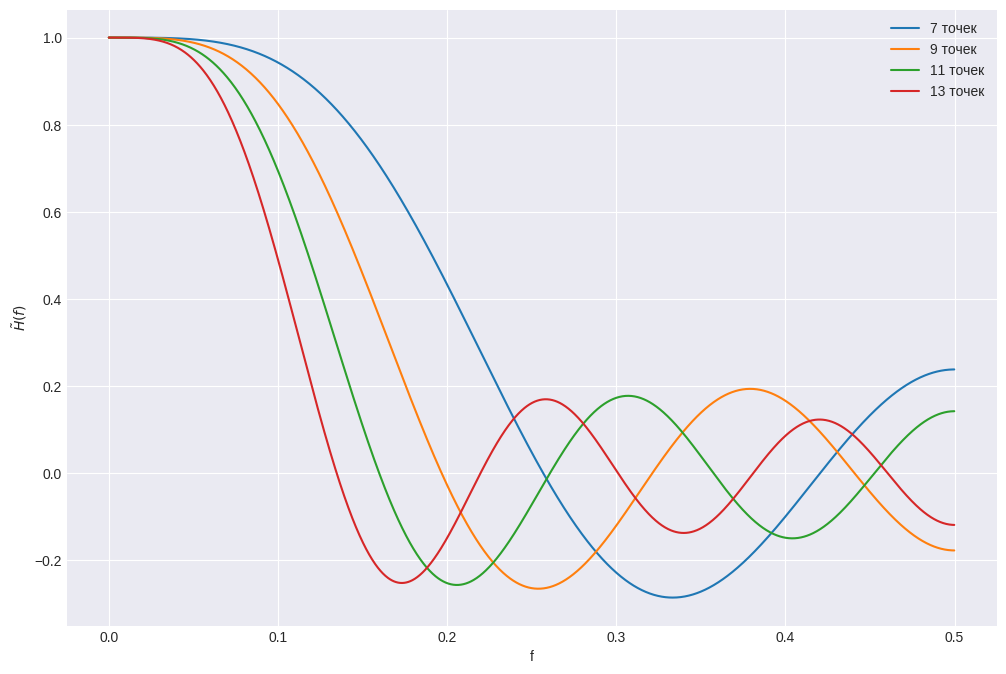

In [3]:
fun_2: dict[int, list[float]] = {
    7: [1 / 21 * (7 + 12 * np.cos(w) + 6 * np.cos(2 * w) - 4 * np.cos(3 * w)) for w in w_freq],
    9: [1 / 231 * (59 + 108 * np.cos(w) + 78 * np.cos(2 * w) + 28 * np.cos(3 * w) - 42 * np.cos(4 * w)) for w in w_freq],
    11: [1 / 429 * (89 + 168 * np.cos(w) + 138 * np.cos(2 * w) + 88 * np.cos(3 * w) + 18 * np.cos(4 * w) - 72 * np.cos(5 * w)) for w in w_freq],
    13: [1 / 143 * (25 + 48 * np.cos(w) + 42 * np.cos(2 * w) + 32 * np.cos(3 * w) + 18 * np.cos(4 * w) - 22 * np.cos(6 * w)) for w in w_freq]
}

plt.figure()
for pnt, fun in fun_2.items():
    plt.plot(freq, fun, label=f'{pnt} точек')


plt.ylabel('$\\tilde H(f)$')
plt.xlabel('f')
plt.legend()

По графикам видно, что увеличение N  сужает полосу пропускания, что приводит к более сильному сглаживанию (сильнее подавляются высокие частоты). По сравнению с предыдущим графиком также видно, что увеличилась частота колебаний на высоких частотах.

### Задание 3
Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Входной сигнал:
$$s(t)$$
Выходной сигнал:
$$y(t)=A+Bt+Ct^2+Dt^3+Et^4$$
Приближение методом МНК полиномом четвёртой степени по девяти точкам:
$$F(A,B,C,D,E)=\sum^{k=4}_{k=-4}(s_k-y_k)^2=\sum^{k=4}_{k=-4}(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2\Rightarrow\min$$
Возьмем частные производые по $A$, $B$, $C$, $D$ и $E$:
$$\frac{\partial F}{\partial A} =\sum^{k=4}_{k=-4} \frac{\partial (s_k-A-Bt-Ct^2-Dt^3-Et^4)^2}{\partial A} = \sum^{k=4}_{k=-4} 2 (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-1) $$
$$\frac{\partial F}{\partial B} = \sum^{k=4}_{k=-4} \frac{\partial (s_k-A-Bt-Ct^2-Dt^3-Et^4)^2}{\partial B} = \sum^{k = 4}_{k=-4} 2 (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-t)$$
$$\frac{\partial F}{\partial C} = \sum^{k=4}_{k=-4} \frac{\partial (s_k-A-Bt-Ct^2-Dt^3-Et^4)^2}{\partial C} = \sum^{k = 4}_{k=-4} 2 (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-t^2)$$
$$\frac{\partial F}{\partial D} = \sum^{k=4}_{k=-4} \frac{\partial (s_k-A-Bt-Ct^2-Dt^3-Et^4)^2}{\partial D} = \sum^{k = 4}_{k=-4} 2 (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-t^3)$$
$$\frac{\partial F}{\partial E} = \sum^{k=4}_{k=-4} \frac{\partial (s_k-A-Bt-Ct^2-Dt^3-Et^4)^2}{\partial E} = \sum^{k = 4}_{k=-4} 2 (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) \cdot (-t^4)$$
Приравняем все к нулю и раскроем суммы:

$$ \sum s_k - A \sum 1 - C \sum k^2 - E \sum k^4 = 0 $$
$$ \sum s_k - 9A - 60C - 708E = 0 $$
$$ \boxed{9A + 60C + 708E = \sum_{k=-4}^{4} s_k} $$

$$ \sum ks_k - B \sum k^2 - D \sum k^4 = 0 $$
$$ \sum ks_k - 60B - 708D = 0 $$
$$ \boxed{60B + 708D = \sum_{k=-4}^{4} k s_k} $$

$$ \sum k^2 s_k - A \sum k^2 - C \sum k^4 - E \sum k^6 = 0 $$
$$ \sum k^2 s_k - 60A - 708C - 9780E = 0 $$
$$ \boxed{60A + 708C + 9780E = \sum_{k=-4}^{4} k^2 s_k} $$

$$ \sum k^3 s_k - B \sum k^4 - D \sum k^6 = 0 $$
$$ \sum k^3 s_k - 708B - 9780D = 0 $$
$$ \boxed{708B + 9780D = \sum_{k=-4}^{4} k^3 s_k} $$

$$ \sum k^4 s_k - A \sum k^4 - C \sum k^6 - E \sum k^8 = 0 $$
$$ \sum k^4 s_k - 708A - 9780C - 144708E = 0 $$
$$ \boxed{708A + 9780C + 144708E = \sum_{k=-4}^{4} k^4 s_k} $$

Составим систему нормальных уравнений:
$$\begin{cases}
9A + 60C + 708E = \sum s_k \\
60B + 708D = \sum ks_k \\
60A + 708C + 9780E = \sum k^2 s_k \\
708B + 9780D = \sum k^3 s_k \\
708A + 9780C + 144708E = \sum k^4 s_k
\end{cases}$$
Сглаженное значение в центре $y_0 = A$. Решая данную систему (например, методом Крамера) и находя $A$, получаем:
$$429A = 15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_0 + 135s_1 + 30s_2 - 55s_3 + 15s_4$$
Получаем:
$$y_0=A=\frac{1}{429}(15s_{-4} - 55s_{-3} + 30s_{-2} + 135s_{-1} + 179s_0 + 135s_1 + 30s_2 - 55s_3 + 15s_4)$$
В общем случае:
$$y_n=\frac{1}{429}(15s_{n-4} - 55s_{n-3} + 30s_{n-2} + 135s_{n-1} + 179s_n + 135s_{n+1} + 30s_{n+2} - 55s_{n+3} + 15s_{n+4})$$
Пусть $s_n=e^{i\omega n}$, тогда:
$$y_n=\frac{1}{429}(15e^{-4i\omega} - 55e^{-3i\omega} + \dots + 179 + \dots + 15e^{4i\omega})e^{i\omega n}=H(\omega)e^{i\omega n}$$
Значит:
$$H(\omega)=\frac{1}{429}(179 + 270\cos(\omega) + 60\cos(2\omega) - 110\cos(3\omega) + 30\cos(4\omega))$$
Вывод для формул для 11, 13 и 15 точек абсолютно аналогичен.

Формула для 11 точек:
$$H(\omega)=\frac{1}{429}(143+240\cos(\omega)+120\cos(2\omega)-20\cos(3\omega)-90\cos(4\omega)+36\cos(5\omega))$$

Формула для 13 точек:
$$H(\omega)=\frac{1}{2431}(677+1200\cos(\omega)+780\cos(2\omega)+220\cos(3\omega)-270\cos(4\omega)-396\cos(5\omega)+220\cos(6\omega))$$

Формула для 15 точек:
$$H(\omega)=\frac{1}{46189}(11063+20250\cos(\omega)+15000\cos(2\omega)+7510\cos(3\omega)-330\cos(4\omega)-5874\cos(5\omega)-5720\cos(6\omega)+4290\cos(7\omega))$$

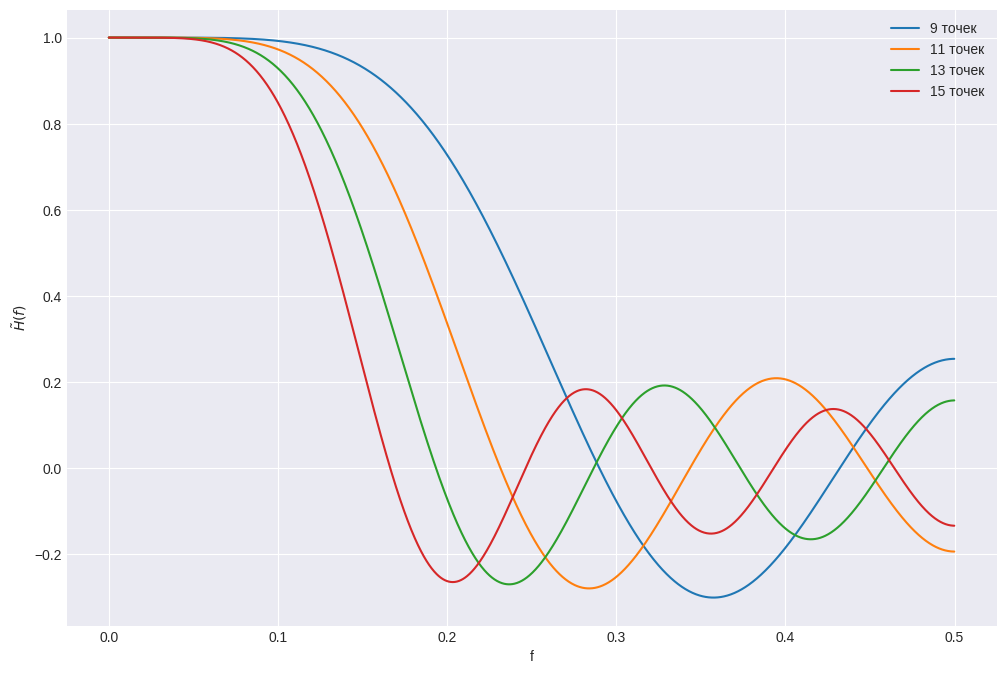

In [4]:
fun_3: dict[int, list[float]] = {
    9: [1 / 429 * (179 + 270 * np.cos(w) + 60 * np.cos(2 * w) - 110 * np.cos(3 * w) + 30 * np.cos(4 * w)) for w in w_freq],
    11: [1 / 429 * (143 + 240 * np.cos(w) + 120 * np.cos(2 * w) - 20 * np.cos(3 * w) - 90 * np.cos(4 * w) + 36 * np.cos(5 * w)) for w in w_freq],
    13: [1 / 2431 * (677 + 1200 * np.cos(w) + 780 * np.cos(2 * w) + 220 * np.cos(3 * w) - 270 * np.cos(4 * w) - 396 * np.cos(5 * w) + 220 * np.cos(6 * w)) for w in w_freq],
    15: [1 / 46189 * (11063 + 20250 * np.cos(w) + 15000 * np.cos(2 * w) + 7510 * np.cos(3 * w) - 330 * np.cos(4 * w) - 5874 * np.cos(5 * w) - 5720 * np.cos(6 * w) + 4290 * np.cos(7 * w)) for w in w_freq]
}

plt.figure()
for pnt, fun in fun_3.items():
    plt.plot(freq, fun, label=f'{pnt} точек')


plt.ylabel('$\\tilde H(f)$')
plt.xlabel('f')
plt.legend()

По сравнению с предыдущим фильтром изменения заметны хуже -- полоса пропускания стала чуть уже. При увеличении N так же полоса пропускания сужается.

### Задание 4
 Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde{H}(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Формулы Спенсера для 15 точек:
$$y_n=\frac{1}{320}(-3s_{n-7}-6s_{n-6}-5s_{n-5}+3s_{n-4}+21s_{n-3}+46s_{n-2}+67s_{n-1}+74s_n+67s_{n+1}+46s_{n+2}+21s_{n+3}+3s_{n+4}-5s_{n+5}-6s_{n+6}-3s_{n+7})$$
$$H(\omega)=\frac{1}{320}(74+134\cos(\omega)+92\cos(2\omega)+42\cos(3\omega)+6\cos(4\omega)-10\cos(5\omega)-12\cos(6\omega)-6\cos(7\omega))$$

Формулы Спенсера для 21 точек:
$$y_n=\frac{1}{350}(-s_{n-10}-3s_{n-9}-5s_{n-8}-5s_{n-7}-2s_{n-6}+6s_{n-5}+18s_{n-4}+33s_{n-3}+47s_{n-2}+57s_{n-1}+60s_n+57s_{n+1}+47s_{n+2}+33s_{n+3}+18s_{n+4}+6s_{n+5}-2s_{n+6}-5s_{n+7}-5s_{n+8}-3s_{n+9}-s_{n+10})$$
$$H(\omega)=\frac{1}{350}(60+114\cos(\omega)+94\cos(2\omega)+66\cos(3\omega)+36\cos(4\omega)+12\cos(5\omega)-4\cos(6\omega)-10\cos(7\omega)-10\cos(8\omega)-6\cos(9\omega)-2\cos(10\omega))$$

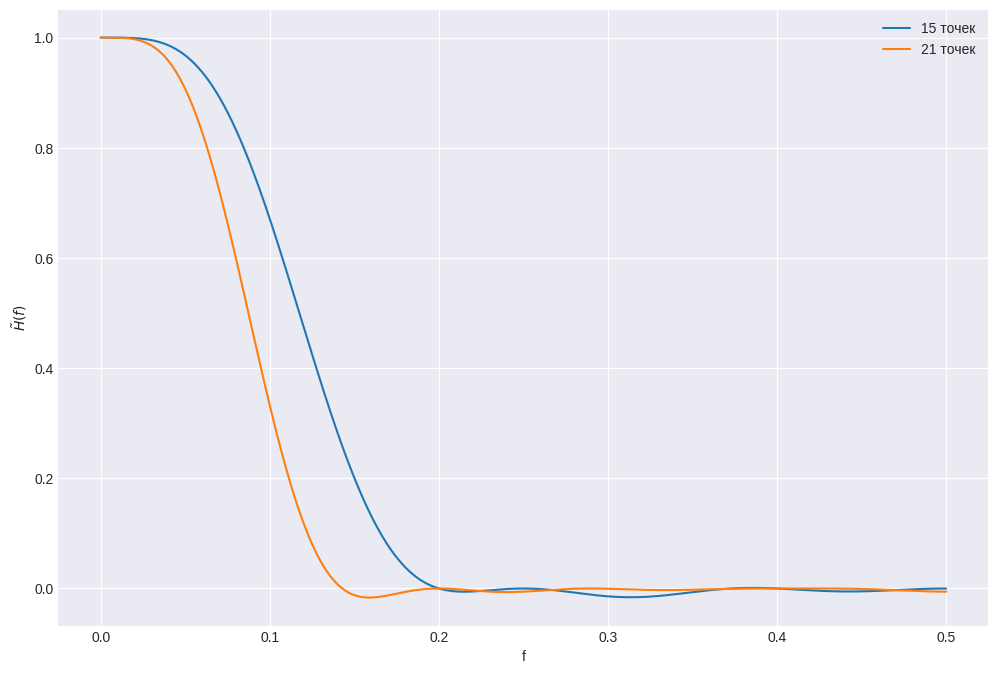

In [5]:
fun_4: dict[int, list[float]] = {
    15: [1 / 320 * (74 + 134 * np.cos(w) + 92 * np.cos(2 * w) + 42 * np.cos(3 * w) + 6 * np.cos(4 * w) - 10 * np.cos(5 * w) - 12 * np.cos(6 * w) - 6 * np.cos(7 * w)) for w in w_freq],
    21: [1 / 350 * (60 + 114 * np.cos(w) + 94 * np.cos(2 * w) + 66 * np.cos(3 * w) + 36 * np.cos(4 * w) + 12 * np.cos(5 * w) - 4 * np.cos(6 * w) - 10 * np.cos(7 * w) - 10 * np.cos(8 * w) - 6 * np.cos(9 * w) - 2 * np.cos(10 * w)) for w in w_freq]
}

plt.figure()
for pnt, fun in fun_4.items():
    plt.plot(freq, fun, label=f'{pnt} точек')


plt.ylabel('$\\tilde H(f)$')
plt.xlabel('f')
plt.legend()



На графике видно, что высокие частоты полностью подавляются. Полосы пропускания для N = 15, 21 ещё уже, чем на прошлых графиках.

### Задание 5
Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

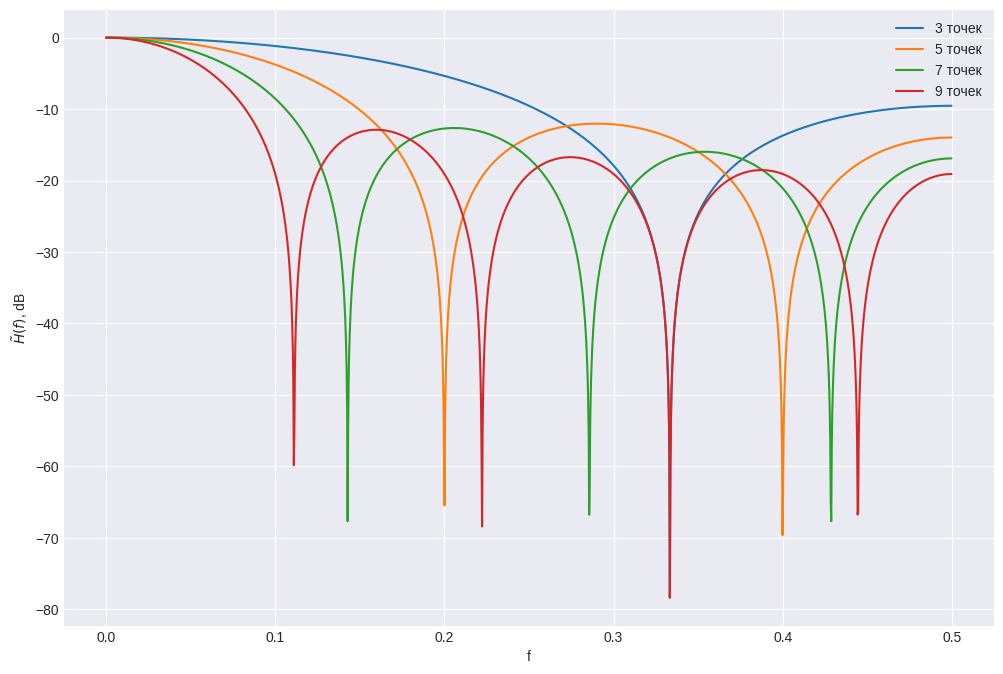

In [6]:
plt.figure()
for pnt, fun in fun_1.items():
  plt.plot(freq, [20 * math.log10(abs(h)) for h in fun], label=f'{pnt} точек')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

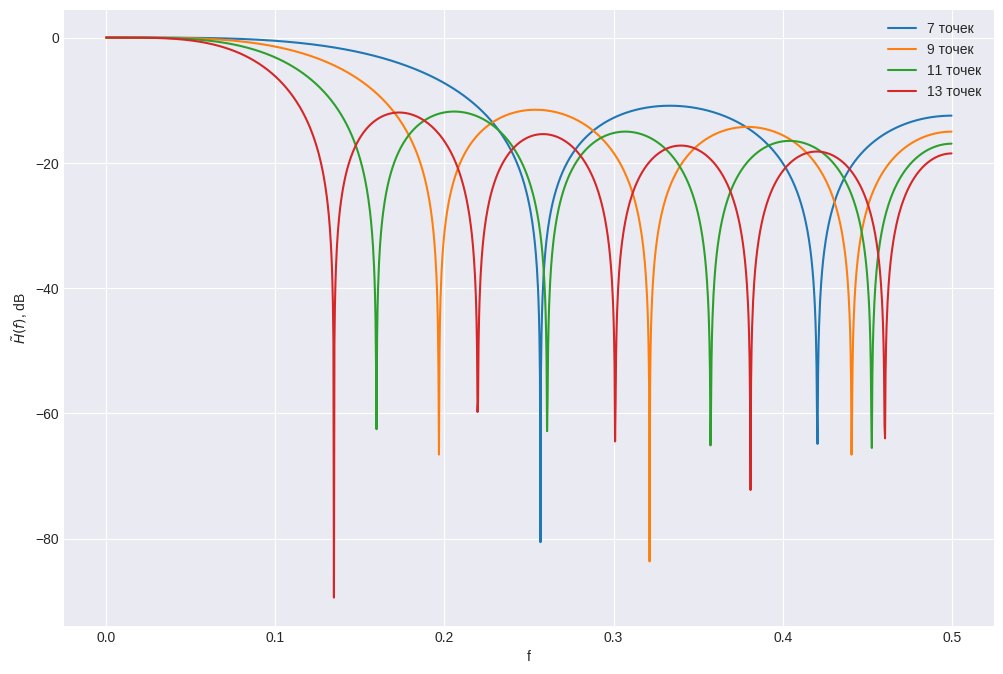

In [7]:
plt.figure()
for pnt, fun in fun_2.items():
  plt.plot(freq, [20 * math.log10(abs(h)) for h in fun], label=f'{pnt} точек')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

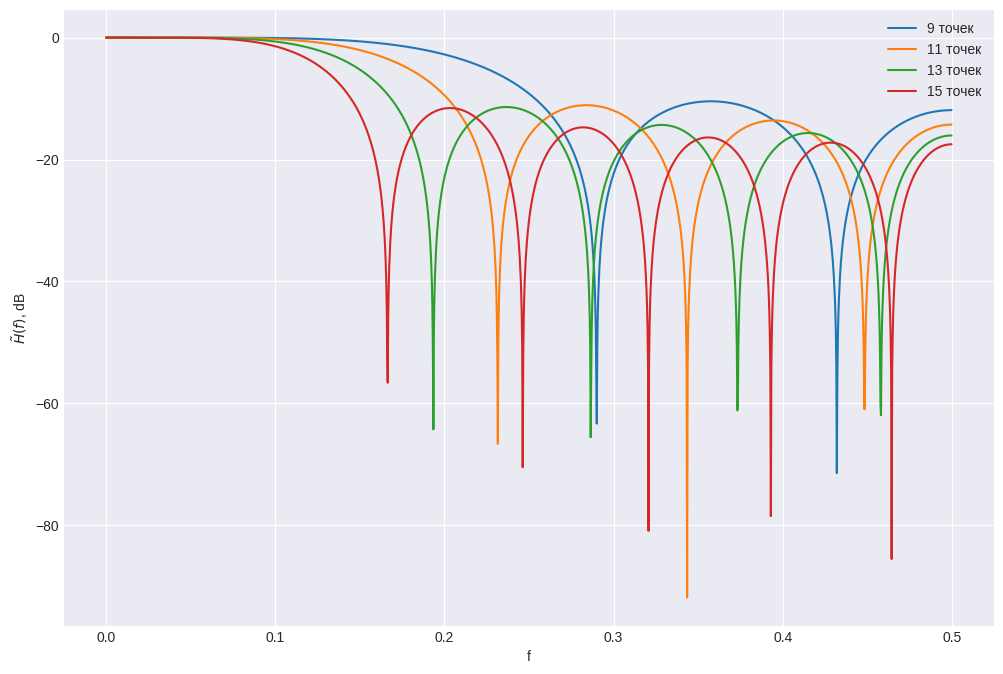

In [8]:
plt.figure()
for pnt, fun in fun_3.items():
  plt.plot(freq, [20 * math.log10(abs(h)) for h in fun], label=f'{pnt} точек')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

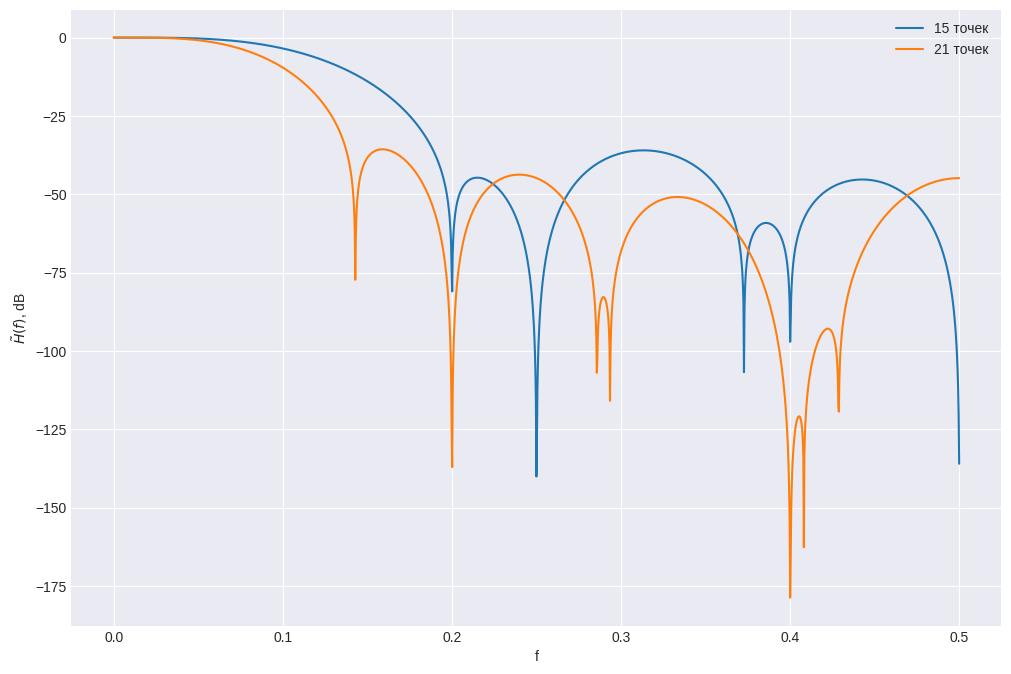

In [9]:
plt.figure()
for pnt, fun in fun_4.items():
  plt.plot(freq, [20 * math.log10(abs(h)) for h in fun], label=f'{pnt} точек')

plt.xlabel('f')
plt.ylabel('$\\tilde H(f)$, dB')
plt.legend()

Линейный график показывает полосу пропускания -- её ширину и тренд (т.е. насколько хорошо он сохраняет полезный сигнал). Но участки с амплитудой близкой к нулю почти неразличимы. Этот недостаток исправляется логарифмической шкалой. На ней видно, как сильно отличаются фильтры в полосе подавления.

### Задание 6
Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Сравнительный анализ графиков передаточных функций показывает, что все исследованные фильтры (полиномиальные 1-й, 2-й, 4-й степени и Спенсера) являются фильтрами нижних частот. Для всех них увеличение числа точек N приводит к сужению полосы пропускания и к более сильному подавлению высоких частот. При этом с ростом степени полинома полоса пропускания расширяется, а колебания в полосе подавления (на высоких частотах) становятся более выраженными. Ключевое отличие фильтра Спенсера заключается в том, что он практически не имеет таких колебаний, обеспечивая значительно более качественное подавление высоких частот по сравнению с полиномиальными фильтрами.

## Выводы

В ходе выполнения данной лабораторной работы были получены аналитические выражения для передаточных функций фильтров, реализующих полиномиальное сглаживание 1-й, 2-й, 4-й степеней, а также сглаживание по формулам Спенсера. На основе этих формул были построены и проанализированы частотные характеристики для различного числа точек N. Построение тех же графиков в логарифмической шкале (дБ) позволило детально исследовать характеристики фильтров в полосе подавления и оценить уровень боковых лепестков, что было невозможно на линейном графике. В завершение был проведен сравнительный анализ, который выявил ключевые различия в эффективности подавления шума и сохранении полезного сигнала для каждого типа фильтра.